# Linear Array
(Uniformly spaced)

This is an example to visualize the antenna array patterns with `antarray` module

In [1]:
import numpy as np
from scipy import signal

In [2]:
import antarray

## Create a `LinearArray` object

---

Parameters
----------
- `size` : int
    - Total size of the linear array
- `spacing` : float
    - Spacing between antenna elements (Normalized to wavelength)

In [3]:
lin_array = antarray.LinearArray(16, 0.5)

Text(0.5, 1.0, 'Array layout')

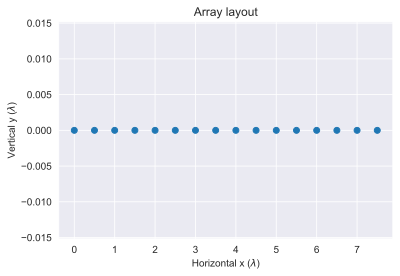

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('darkgrid')

plt.scatter(lin_array.x, lin_array.y)
plt.xlabel(r'Horizontal x ($\lambda$)')
plt.ylabel(r'Vertical y ($\lambda$)')
plt.title('Array layout')

## Get pattern

---

Parameters
----------
- `theta` : 1-D array
    - Angles for calculation (deg)
- `beam_loc` : float, optional
    - Angle of the main beam (deg) (default is 0)
- `window` : str, optional
    - Window type, supports `Square`, `Chebyshev`, `Taylor`, `Hamming`, and, `Hanning` (default is `Square`)
- `sll` : float, optional
    - Desired peak sidelobe level in decibels (dB) relative to the mainlobe (default is -60)
- `nbar` : int, optional
    - Number of nearly constant level sidelobes adjacent to the mainlobe (Only works with Taylor window) (default is 4)

Returns
-------
- dict(
    - `array_factor` : 1-D array
        - Array pattern in linear scale
    - `weight` : 1-D array
        - Element weighting to form the pattern
)


Text(0.5, 1.0, 'Array factor')

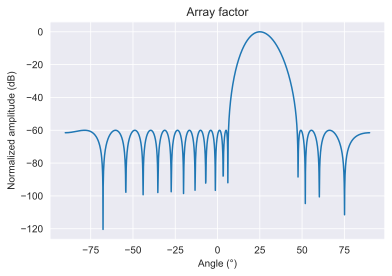

In [5]:
theta = np.arange(-90, 90, 0.1)
pattern = lin_array.get_pattern(
    theta, beam_loc=25, window='Chebyshev', sll=-60)

plt.plot(theta, 20*np.log10(np.abs(pattern['array_factor'])))
plt.xlabel('Angle (°)')
plt.ylabel('Normalized amplitude (dB)')
plt.title('Array factor')

## Update array parameters

---
Parameters
----------
- `size` : int
    - Total size of the linear array
- `spacing` : float
    - Spacing between antenna elements (Normalized to wavelength)

Text(0.5, 1.0, 'Array layout')

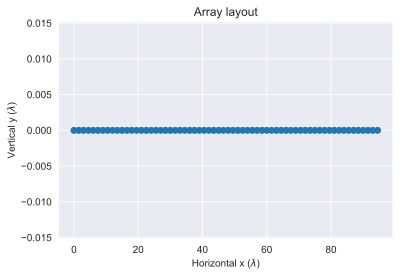

In [6]:
lin_array.update_parameters(size=64, spacing=1.5)

plt.scatter(lin_array.x, lin_array.y)
plt.xlabel(r'Horizontal x ($\lambda$)')
plt.ylabel(r'Vertical y ($\lambda$)')
plt.title('Array layout')

Text(0.5, 1.0, 'Array factor')

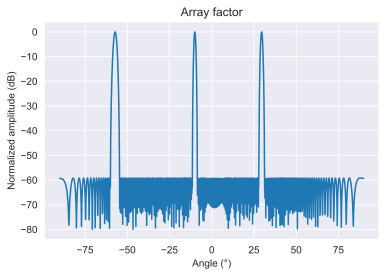

In [7]:
theta = np.arange(-90, 90, 0.1)
pattern = lin_array.get_pattern(
    theta, beam_loc=-10, window='Chebyshev', sll=-60)

plt.plot(theta, 20*np.log10(np.abs(pattern['array_factor'])+0.0001))
plt.xlabel('Angle (°)')
plt.ylabel('Normalized amplitude (dB)')
plt.title('Array factor')